<H1>
<center> Indian Institute of Technology, Goa <center>
<br>
<center> Machine learning CS331 </center>
<br>
<center> Course Instructor: Dr Satyanath Bhat <center>
<br>
<center> Lab Assignment 3 </center> 
</H1>
<H2>
<center> GroupID: RuAsRaDe </center>
<br>
<center> Group Details </center>
</H2>
    
| Name             | Roll No.|
|------------------|---------|
| Rujul Dwivedi | 2103319 |
| Ashish Kumar Rathore | 2103304 |
| Rahul Saini   | 2103318 |
| Deepak Kumar  | 2103308 |

**Question 1**

In [18]:
import numpy as np #for numerical computation
import pandas as pd #for data manipulation and analysis
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization
import copy #for deep copy

In [19]:
df = pd.read_csv('faithful.csv') #load the dataset
df= df.drop('Unnamed: 0',axis=1) #drop the first column
df.columns = ['eruptions','waiting'] #rename the columns

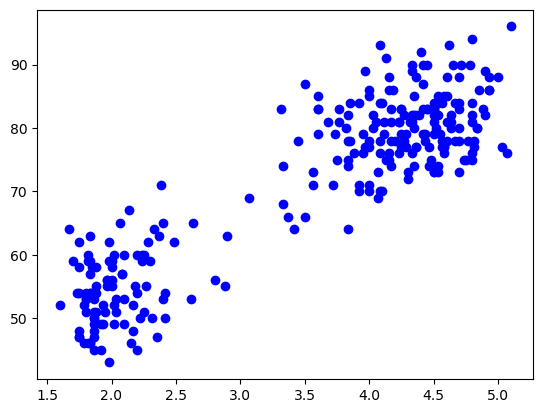

In [20]:
plt.scatter(df['eruptions'],df['waiting'], c = 'blue', marker = 'o',label = 'Displaying points on a graph') #plotting the points
plt.show() #displaying the plot

In [21]:
def E_Step(X, centroids): #function to calculate the E-step
    distance= np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2) #calculate the distance between the points and the centroids
    final_labels = np.argmin(distance, axis=1) #assign the points to the nearest centroid
    return final_labels #return the labels or the cluster to which the points belong

In [22]:
def M_Step(X,centroids,labels): #function to calculate the M-step
    K = centroids.shape[0] #number of clusters
    for k in range(K): #loop through the clusters
        centroids[k, :] = np.mean(X[labels == k, :], axis=0) #calculate the new centroids
    return centroids #return the new centroids

In [23]:
def converge(prev_centroid, new_centroid): #function to check for convergence
    return np.linalg.norm(prev_centroid - new_centroid) #return the difference between the previous and new centroids

In [24]:
def Cost_Function(centroids, labels): #function to calculate the cost
    k = len(centroids) #number of clusters
    total_cost = 0 #initialize the cost to 0
    for i in range(k): #loop through the clusters
        X_i = X[labels == i]  #get all points that belong to cluster i 
        centroid_i = centroids[i]  #get the centroid of cluster i
        distances = np.linalg.norm(X_i - centroid_i, axis=1)  #calculate the distance between the points and the centroid
        total_cost += np.sum(distances ** 2)  #calculate the cost
        
    return total_cost #return the cost

number of iterations required : 3


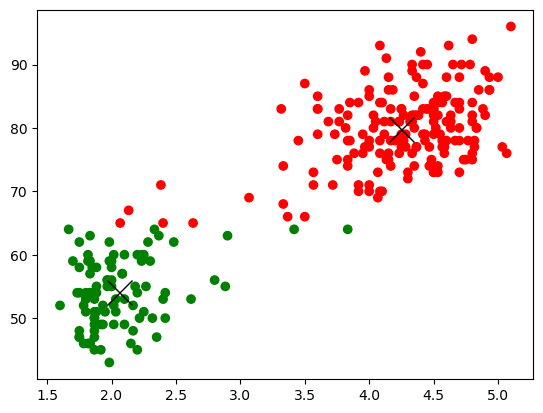

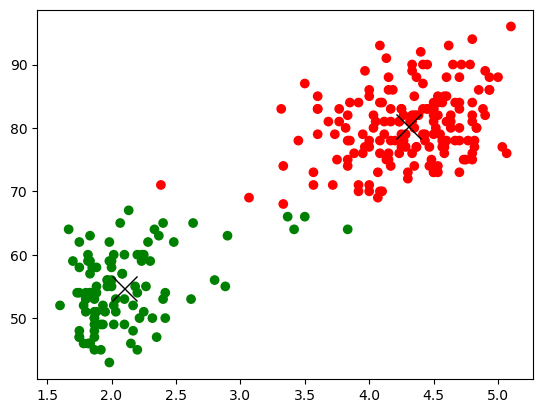

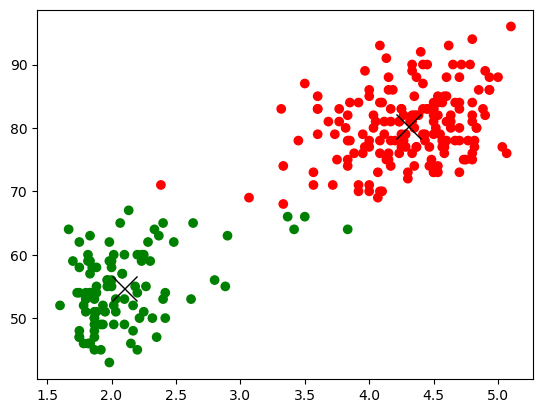

In [26]:
X = df.values #convert the dataframe to a numpy array
K=2 #number of clusters
new_centroids = X[np.random.choice(X.shape[0], K, replace=False), :] #initialize the centroids
prev_centroids = np.zeros((K, 2)) #initialize the previous centroids
counter = 0 #initialize the counter
likelihood = [] #initialize the likelihood
label_color=['r','b'] #colors for the clusters
while(converge(new_centroids,prev_centroids)<1e-6): #loop until convergence
    prev_centroids=copy.deepcopy(new_centroids) #deep copy the new centroids
    label = E_Step(X, new_centroids) #E-step
    likelihood.append(Cost_Function(new_centroids, label)) #calculate the cost and append it to the likelihood    
    new_centroids = M_Step(X,new_centroids, label) #M-step
    likelihood.append(Cost_Function(new_centroids, label)) #calculate the cost and append it to the likelihood        
    plt.figure() #create a new figure
    colormap = np.array(['r', 'g']) #colors for the clusters
    plt.scatter(x=df['eruptions'], y=df['waiting'], c = colormap[label]) #plot the points
    
    for i in range(0, K): #loop through the clusters
        plt.plot(new_centroids[i][0], new_centroids[i][1], marker="x",markersize=18, markeredgecolor="black") #plot the centroids
    
    counter= counter+1 #increment the counter
print("number of iterations required : %d" %counter) #print the number of iterations required


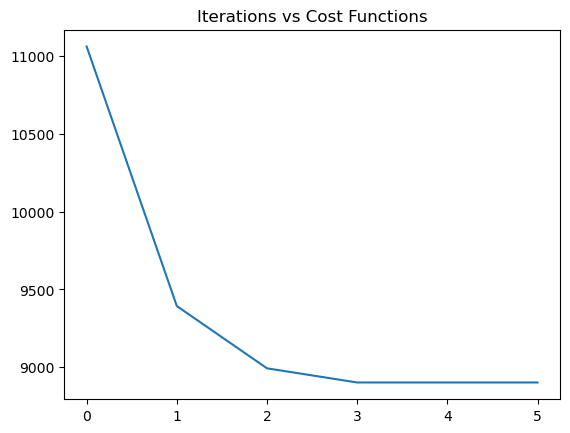

In [27]:
plt.plot(range(2*counter),likelihood) #plot the likelihood
#We did 2*counter because we have 2 likelihood values for each iteration
plt.title('Iterations vs Cost Functions') #title of the plot
plt.show() #display the plot

**Question 2**

In [43]:
import numpy as np #for numerical computation
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for data visualization
import copy #for deep copy
import matplotlib.image as img #for image manipulation

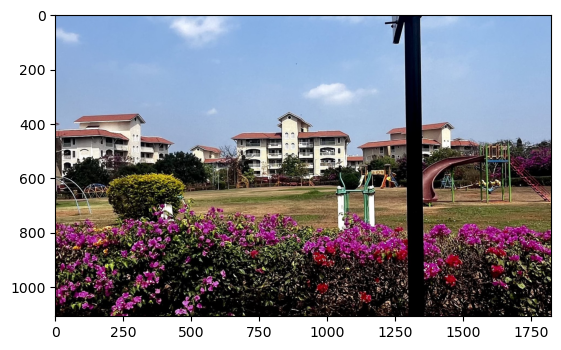

In [44]:
image = img.imread("park.jpg") #load the image
plt.imshow(image) #display the image

In [45]:
features = np.float32(image.reshape(-1,3)) #reshape the image
df = pd.DataFrame(features) #convert the features to a dataframe
df #display the dataframe

,0,1,2
0,131.0,168.0,223.0
1,131.0,168.0,223.0
2,131.0,168.0,223.0
3,131.0,168.0,223.0
4,132.0,169.0,224.0
...,...,...,...
2022095,27.0,16.0,14.0
2022096,83.0,68.0,65.0
2022097,136.0,118.0,114.0
2022098,192.0,174.0,170.0


In [46]:
def E_Step(X, centroids): #function to calculate the E-step
    distance= np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2) #calculate the distance between the points and the centroids
    final_labels = np.argmin(distance, axis=1) #assign the points to the nearest centroid
    return final_labels #return the labels or the cluster to which the points belong

In [47]:
def M_Step(X,centroids,labels): #function to calculate the M-step
    K = centroids.shape[0] #number of clusters
    for k in range(K): #loop through the clusters
        centroids[k, :] = np.mean(X[labels == k, :], axis=0) #calculate the new centroids
    return centroids #return the new centroids

In [48]:
def converge(prev_centroid, new_centroid): #function to check for convergence
    return np.linalg.norm(prev_centroid - new_centroid) #return the difference between the previous and new centroids

In [49]:
def CostFunction(X,centroids,labels): #function to calculate the cost
    K = centroids.shape[0] #number of clusters
    cost=0 #initialize the cost to 0
    for k in range(K): #loop through the clusters
        Xk= X[labels ==k] #get all points that belong to cluster k
        centroid = centroids[k] #get the centroid of cluster k
        cost+= np.sum(np.linalg.norm(Xk - centroid, axis=1)) #calculate the cost
    return cost #return the cost

In [50]:
def K_Means(X,K): #function to implement the K-means algorithm
   
    mu= np.array(df.sample(K)) #initialize the centroids
    prev_mu = np.array(df.sample(K)) #initialize the previous centroids
    
    counter = 0 #initialize the counter
    cost = [] #initialize the cost
    while(converge(prev_mu,mu)>1e-6): #loop until convergence
        counter+=1 #increment the counter
        prev_mu=copy.deepcopy(mu) #deep copy the new centroids
        
        labels = E_Step(X,mu).astype(int) #E-step
        cost.append(CostFunction(X,mu,labels)) #calculate the cost and append it to the cost  
        
        mu = M_Step(X, mu,labels) #M-step
        cost.append(CostFunction(X,mu,labels)) #calculate the cost and append it to the cost   

    return labels, mu #return the labels and the centroids

In [51]:
def segmentImage(df,K): #function to segment the image
  X = df.values #convert the dataframe to a numpy array
  labels, centroids = K_Means(X,K) #implement the K-means algorithm
  centroids = np.uint8(centroids) #convert the centroids to unsigned integers
  labels=np.uint8(labels) #convert the labels to unsigned integers
  segmented_pixels = centroids[labels.flatten()] #segment the pixels
  segmented_image = segmented_pixels.reshape((image.shape)) #reshape the segmented pixels
  return segmented_image #return the segmented image

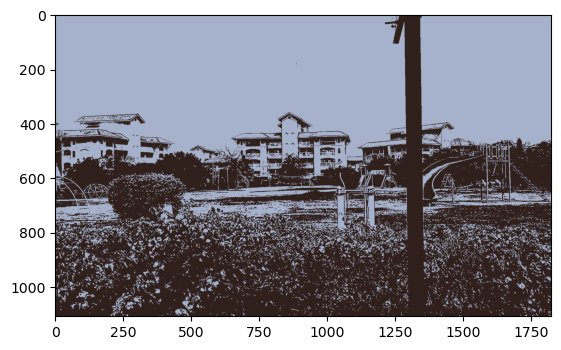

In [53]:
plt.imshow(segmentImage(df,2)) #display the segmented image with 2 clusters

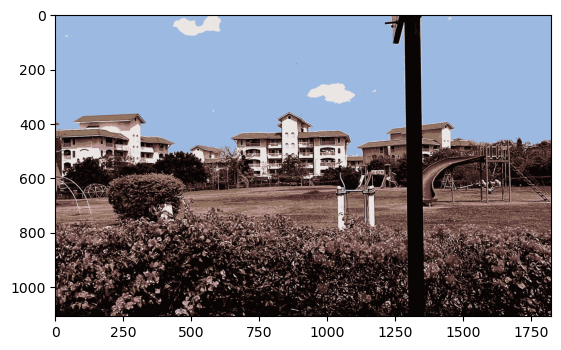

In [54]:
plt.imshow(segmentImage(df,7)) #display the segmented image with 7 clusters

c:\Users\Rujul\OneDrive - iitgoa.ac.in\Documents\Python Files\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Rujul\OneDrive - iitgoa.ac.in\Documents\Python Files\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Rujul\AppData\Local\Temp\ipykernel_13648\914960437.py:4: RuntimeWarning: invalid value encountered in cast
  centroids = np.uint8(centroids) #convert the centroids to unsigned integers


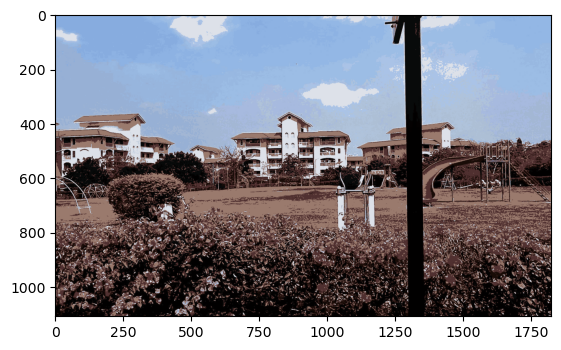

In [55]:
plt.imshow(segmentImage(df,20)) #display the segmented image with 20 clusters

C:\Users\Rujul\AppData\Local\Temp\ipykernel_13648\914960437.py:4: RuntimeWarning: invalid value encountered in cast
  centroids = np.uint8(centroids) #convert the centroids to unsigned integers


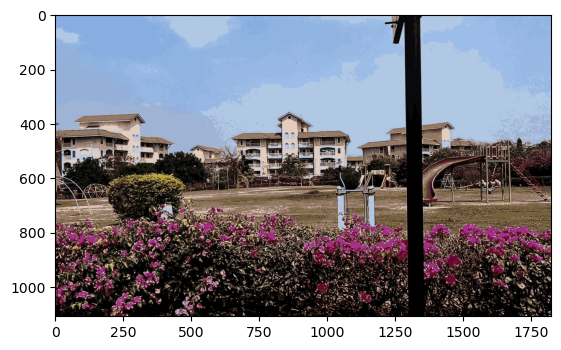

In [57]:
plt.imshow(segmentImage(df,25)) #display the segmented image with 25 clusters

**Question 3 (a)**

In [59]:
import numpy as np #for numerical computation
from scipy.stats import multivariate_normal as mvn #for multivariate normal distribution
import matplotlib.pyplot as plt #for data visualization
import pandas as pd #for data manipulation and analysis
import seaborn as sns #for data visualization

In [60]:
def calculatez(mean, covariance): #function to calculate the z values
    x, y = np.mgrid[-1:2:.05, -1:2:.05] #create a meshgrid
    data = np.column_stack([x.flat, y.flat]) #stack the x and y values
    z = mvn.pdf(data,mean, covariance).reshape(x.shape) #calculate the z values
    return x,y,z #return the x, y and z values

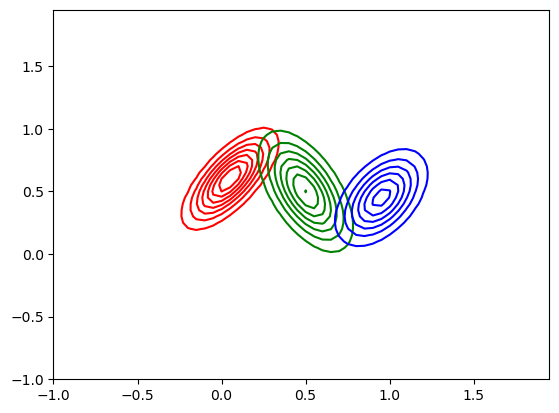

In [61]:
mean1 = np.array([0.05,0.60]) #mean of the first cluster
covariance1 = np.array([[0.1,0.05],
                [0.1,0.2]]) #covariance of the first cluster
covariance1 /= 5 #divide the covariance by 5 to make the cluster more spread out

x1,y1,Z1=calculatez(mean1,covariance1) #calculate the z values

mean2 = np.array([0.5,0.5]) #mean of the second cluster
covariance2 = np.array([[0.1,0.15],
                 [-0.1,0.3]]) #covariance of the second cluster
covariance2 /= 5 #divide the covariance by 5 to make the cluster more spread out

x2,y2,Z2=calculatez(mean2,covariance2) #calculate the z values

mean3 = np.array([0.95,0.45]) #mean of the third cluster
covariance3 = np.array([[0.1,0.07],[0.07,0.2]]) #covariance of the third cluster
covariance3 /= 5 #divide the covariance by 5 to make the cluster more spread out

x3,y3,Z3=calculatez(mean3,covariance3) #calculate the z values

plt.contour(x1, y1, Z1,colors='red') #plot the first cluster
plt.contour(x2, y2, Z2,colors='green') #plot the second cluster
plt.contour(x3, y3, Z3,colors='blue') #plot the third cluster
plt.show() #display the plot

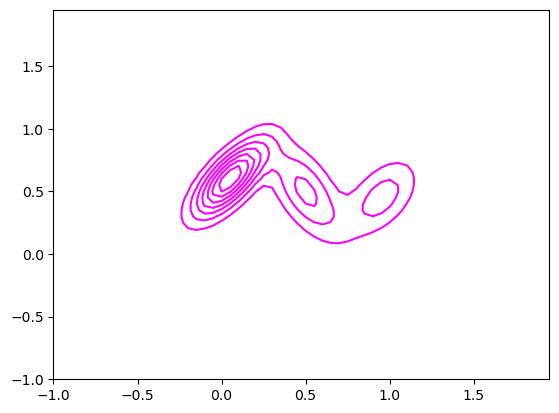

In [62]:
pi_1 = 0.5 #probability of the first cluster
pi_2 = 0.3 #probability of the second cluster
pi_3 = 0.2 #probability of the third cluster
Z=pi_1*Z1 + pi_2*Z2 + pi_3*Z3 #calculate the z values
plt.contour(x1,y1,Z,colors='magenta') #plot the clusters

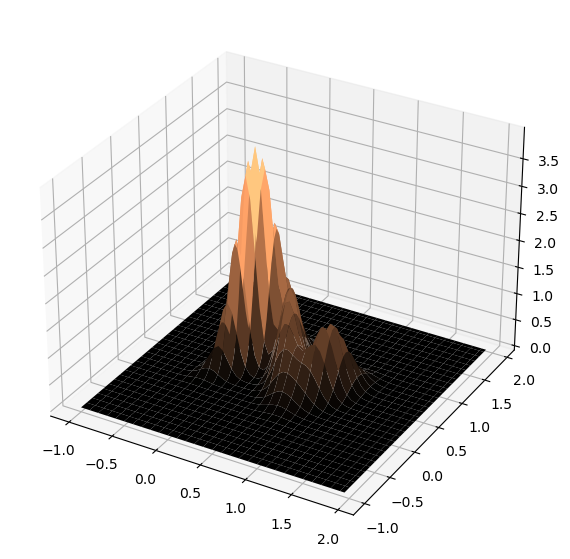

In [63]:
fig=plt.figure(figsize=(7,7)) #create a new figure
ax = plt.axes(projection='3d') #create a 3D plot
ax.plot_surface(x1, y1, Z,cmap='copper', edgecolor='none') #plot the surface
plt.show() #display the plot

**Question 3 (b)**

In [64]:
arr=[] #initialize an empty list
mean = np.array([mean1,mean2,mean3]) #mean of the clusters
cov = np.array([covariance1,covariance2,covariance3]) #covariance of the clusters

stock= np.random.multinomial(1,[pi_1,pi_2,pi_3],size=500) #generate the stock
stock = np.argmax(stock,axis=1) #get the index of the maximum value
for i in range(500): #loop through the stock
    p=np.random.multivariate_normal(mean[stock[i]],cov[stock[i]],1) #generate the random values
    p.reshape(-1) #reshape the values
    p= np.append(p,stock[i]) #append the stock to the values
    arr.append(p) #append the values to the list

C:\Users\Rujul\AppData\Local\Temp\ipykernel_13648\1813081991.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  p=np.random.multivariate_normal(mean[stock[i]],cov[stock[i]],1) #generate the random values


In [65]:
df= pd.DataFrame(arr) #convert the list to a dataframe
df #display the dataframe

,0,1,2
0,0.656014,0.687218,1.0
1,0.048121,0.732596,0.0
2,0.082091,0.670196,0.0
3,0.081461,0.680611,0.0
4,0.786621,0.581804,1.0
...,...,...,...
495,0.295205,0.517572,1.0
496,0.161107,0.552143,0.0
497,-0.184554,0.556050,0.0
498,-0.056493,0.539904,0.0


<Axes: xlabel='0', ylabel='1'>

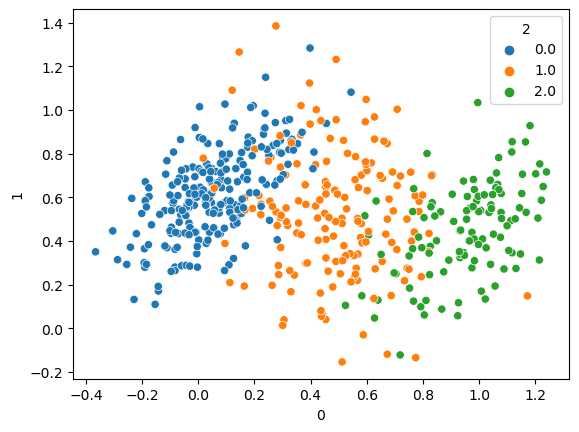

In [66]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],palette='tab10') #plot the clusters
#I used seaborn to plot the clusters because it is more visually appealing

In [67]:
posterior=np.zeros((500,3)) #initialize the posterior
for i in range(500): #loop through the data
    posterior[i][0]=pi_1*mvn.pdf([df.iloc[i][0],df.iloc[i][1]],mean[0],cov[0])/(float)(len(df[df[2]==0])) #calculate the numerator of the 1st posterior
    posterior[i][1]=pi_2*mvn.pdf([df.iloc[i][0],df.iloc[i][1]],mean[1],cov[1])/(float)(len(df[df[2]==1])) #calculate the numerator of the 2nd posterior
    posterior[i][2]=pi_3*mvn.pdf([df.iloc[i][0],df.iloc[i][1]],mean[2],cov[2])/(float)(len(df[df[2]==2])) #calculate the numerator of the 3rd posterior
    posterior[i][0]=posterior[i][0]/(posterior[i][0]+posterior[i][1]+posterior[i][2]) #calculate the posterior of the 1st cluster
    posterior[i][1]=posterior[i][1]/(posterior[i][0]+posterior[i][1]+posterior[i][2]) #calculate the posterior of the 2nd cluster
    posterior[i][2]=posterior[i][2]/(posterior[i][0]+posterior[i][1]+posterior[i][2]) #calculate the posterior of the 3rd cluster

posterior #display the posterior

array([[1.57919857e-06, 9.60536396e-01, 5.43188664e-05],
       [9.96868815e-01, 3.49835557e-05, 1.70427213e-17],
       [9.96244029e-01, 6.20644803e-05, 9.19922641e-16],
       ...,
       [9.99999655e-01, 6.14095131e-10, 1.83672598e-22],
       [9.99986993e-01, 1.61996566e-07, 3.38892681e-18],
       [2.17796154e-01, 6.58550578e-03, 3.39084119e-10]])

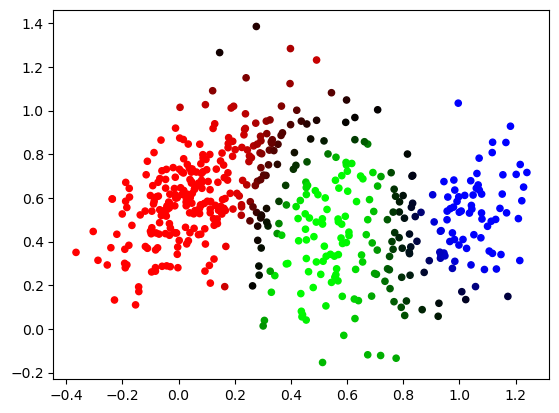

In [68]:
x = df[0] #x values
y = df[1] #y values
rgb = posterior #colors

fig, ax = plt.subplots() #create a new figure
plt.scatter(x, y, s=20, facecolors=rgb) #plot the points
plt.show() #display the plot

**Question 4**

In [19]:
import numpy as np #for numerical computation
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for data visualization
from scipy.stats import multivariate_normal as mvn #for multivariate normal distribution

In [20]:
df = pd.read_csv('faithful.csv') #load the dataset
df= df.drop('Unnamed: 0',axis=1) #drop the first column
df.columns = ['eruptions','waiting'] #rename the columns
df #display the dataframe

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


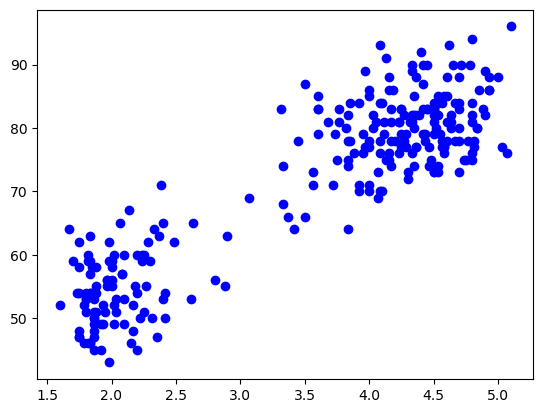

In [21]:
plt.scatter(df["eruptions"],df['waiting'], c = 'blue', marker = 'o',label = 'Displaying points on a graph' ) #plot the points
plt.show() #display the plot

In [22]:
def Z_Calc(mean, covariance): #function to calculate the z values
    x, y = np.mgrid[1:6:.5, 20:100:.5] #create a meshgrid
    data = np.column_stack([x.flat, y.flat]) #stack the x and y values
    z = mvn.pdf(data,mean, covariance).reshape(x.shape) #calculate the z values
    return x,y,z #return the x, y and z values

In [23]:
def E_Step(X,mean,covariance,coeff): #function to calculate the E-step
    K=covariance.shape[0] #number of clusters
    gamma = np.zeros(shape=(X.shape[0], K)) #initialize the gamma
    for k in range(K): #loop through the clusters
        gamma[:, k] = mvn.pdf(X, mean[k], covariance[k]) * coeff[k] #calculate the gamma
    gamma = gamma/np.sum(gamma, axis=1, keepdims=True) #normalize the gamma
    return gamma #return the gamma

In [24]:
def M_Step(X,gamma): #function to calculate the M-step
    N=X.shape[0] #number of points
    K=gamma.shape[1] #number of clusters
    pi = np.sum(gamma, axis=0)/np.sum(gamma) #calculate the pi
    mean = X[np.random.choice(N, size=K, replace=False), :] #initialize the mean
    covariance = np.zeros(shape=(K, X.shape[1], X.shape[1]), dtype=np.float64) #initialize the covariance
    for k in range(K): #loop through the clusters
        mean[k, :] = np.sum(gamma[:, k].reshape(-1,1) * X, axis=0) / np.sum(gamma[:, k], keepdims=True) #calculate the mean
        covariance[k, :, :] = np.sum(gamma[:, k].reshape(-1, 1, 1) * ((X-mean[k, :]).reshape(N, X.shape[1], 1)@(X-mean[k, :]).reshape(N, 1, X.shape[1])), axis=0) /np.sum(gamma[:, k]) #calculate the covariance
    return mean, covariance, pi #return the mean, covariance and pi

In [25]:
def logLikelihood(X,gamma,covariance,mean,pi): #function to calculate the log likelihood
    K = mean.shape[0] #number of clusters
    likelihood=0 #initialize the likelihood
    for k in range(K): #loop through the clusters
        likelihood += np.sum(gamma[:, k] * (np.log(mvn.pdf(X, mean=mean[k], cov=covariance[k])) + np.log(pi[k]))) #calculate the likelihood
    return likelihood #return the likelihood

In [28]:
def initialize_parameters(df, K): #function to initialize the parameters
    X = df.values #convert the dataframe to a numpy array
    N, D = X.shape #number of points and dimensions
    mean = X[np.random.choice(N, size=K, replace=False), :] #initialize the mean
    pi = np.ones(shape=(K), dtype=np.float64) / K #initialize the pi
    covariance = np.zeros(shape=(K, D, D), dtype=np.float64) #initialize the covariance
    for d in range(D): #loop through the dimensions
        covariance[:, d, d] = np.var(X[:, d]) / 10 #initialize the covariance and divide by 10 to make the clusters more spread out
    return X, mean, pi, covariance #return the X, mean, pi and covariance

def gaussianMixtureModel(df, K, delta=0.0001): #function to implement the Gaussian Mixture Model
    X, mean, pi, covariance = initialize_parameters(df, K) #initialize the parameters
    current_likelihood = 1e9 #initialize the current likelihood
    previous_likelihood = 0.0 #initialize the previous likelihood

    while abs(current_likelihood - previous_likelihood) > delta: #loop until convergence
        gamma = E_Step(X, mean, covariance, pi) #E-step
        mean, covariance, pi = M_Step(X, gamma) #M-step
        previous_likelihood = current_likelihood #update the previous likelihood
        current_likelihood = logLikelihood(X, gamma, covariance, mean, pi) #calculate the current likelihood
        labels = np.argmax(gamma, axis=1) #get the labels
        plot_clusters(df, gamma, mean, covariance, K) #plot the clusters

    return mean, covariance, pi, gamma, labels #return the mean, covariance, pi, gamma and labels

def plot_clusters(df, gamma, mean, covariance, K): #function to plot the clusters
    plt.figure() #create a new figure
    colors = ['blue', 'red', 'black'] #colors for the clusters
    plt.scatter(df['eruptions'], df['waiting'], c=gamma[:, 1], cmap='cool') #plot the points
    for i in range(K): #loop through the clusters
        x, y, z = Z_Calc(mean[i], covariance[i]) #calculate the z values
        plt.contour(x, y, z, colors=colors[i]) #plot the clusters
    plt.show() #display the plot

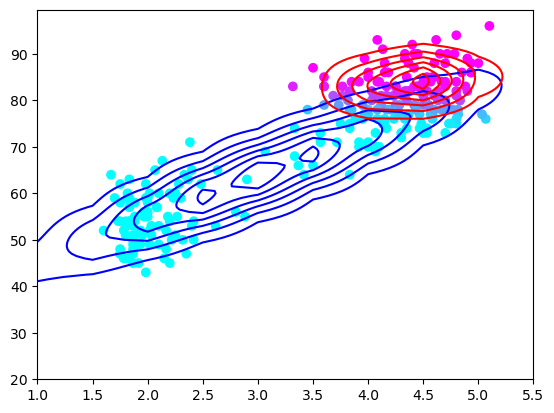

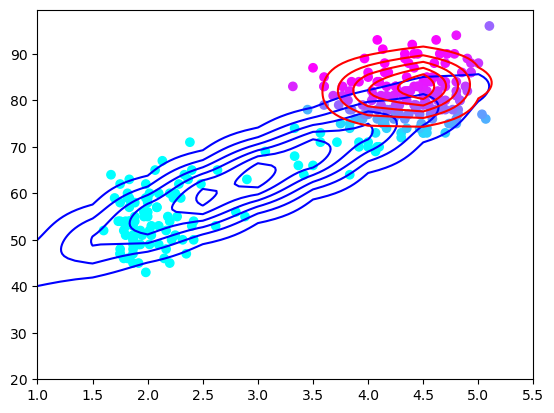

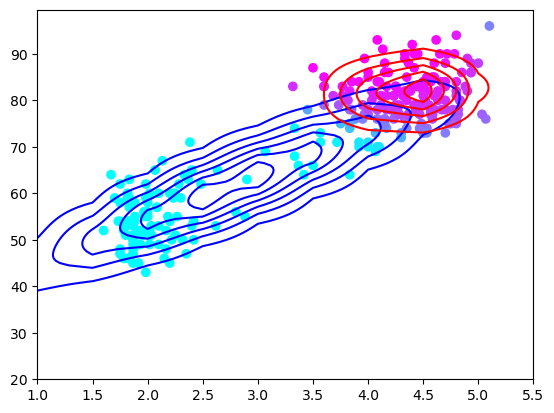

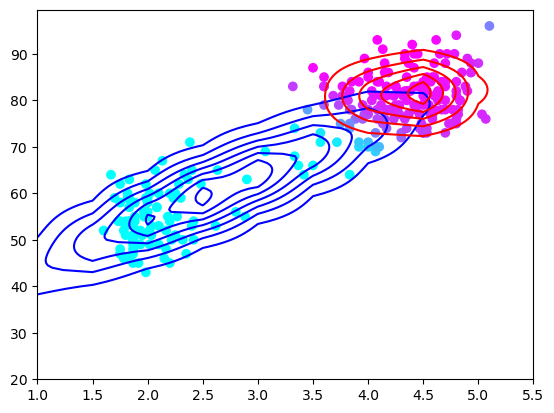

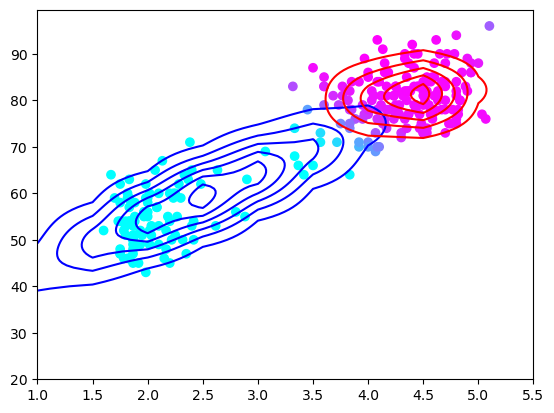

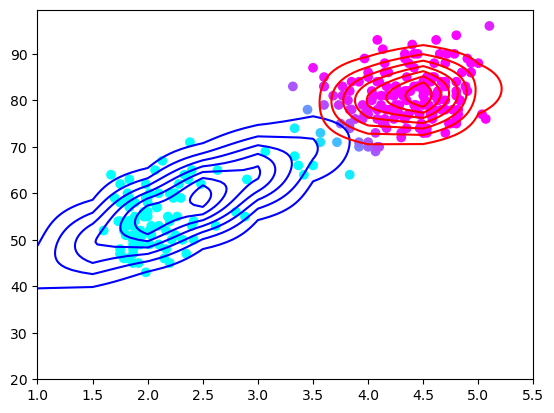

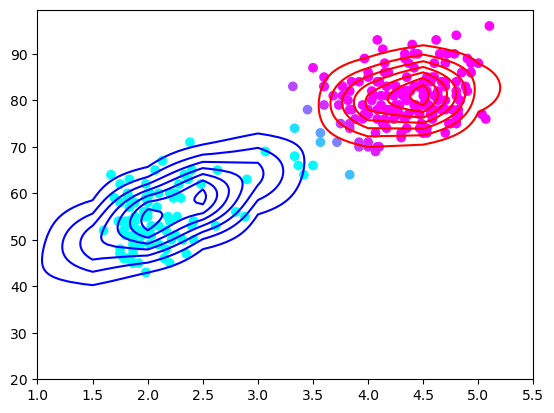

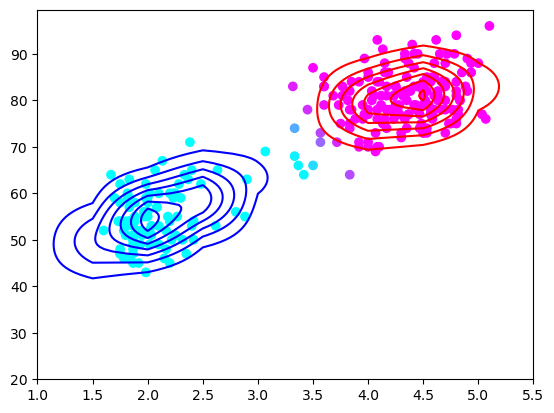

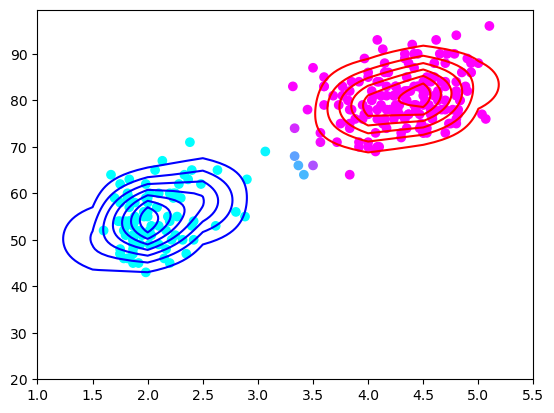

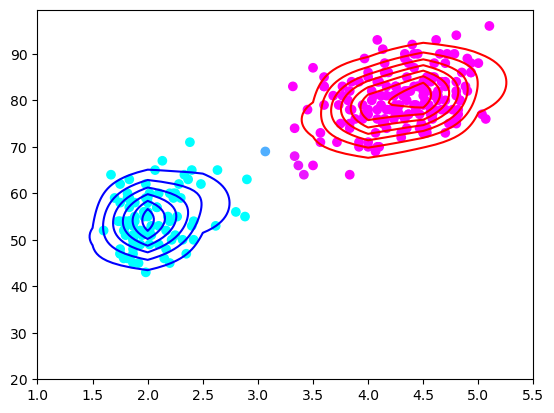

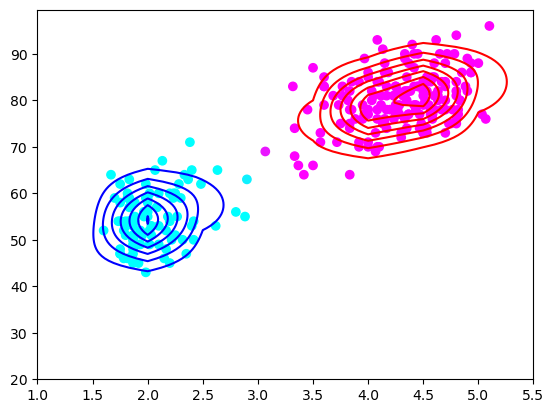

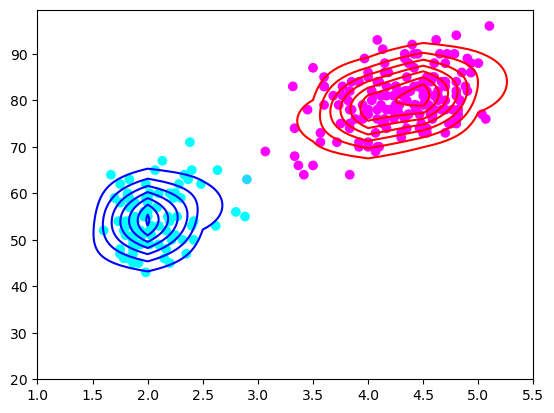

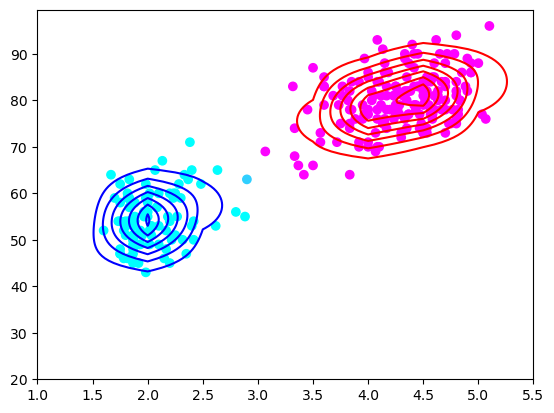

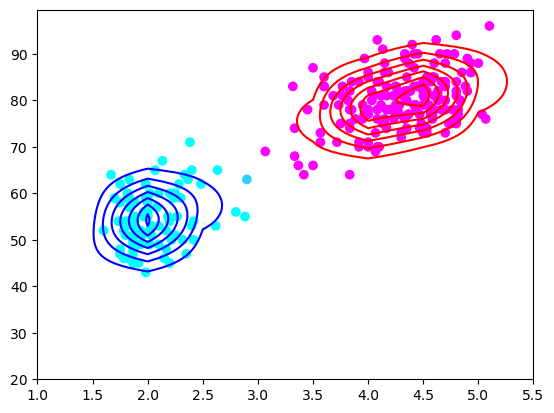

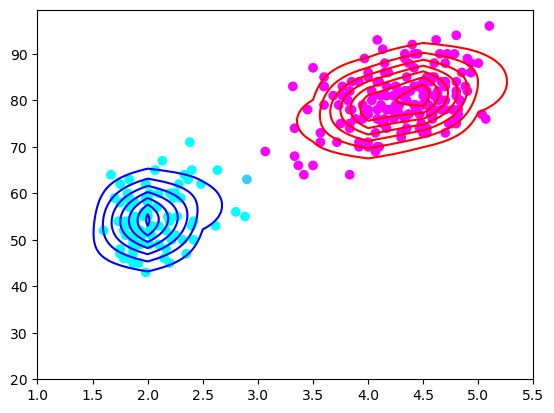

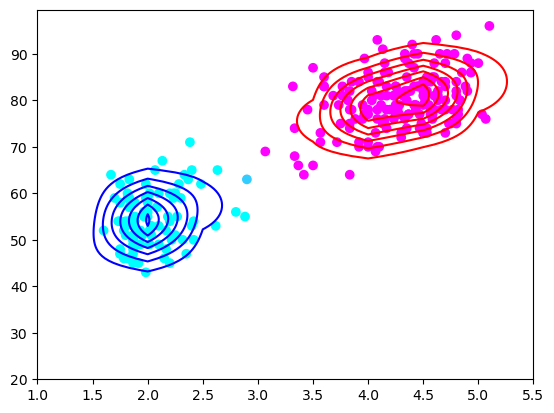

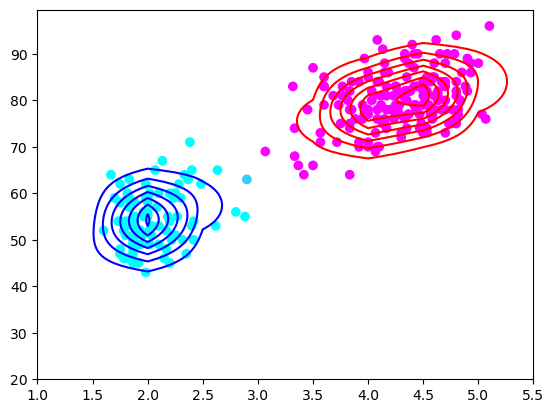

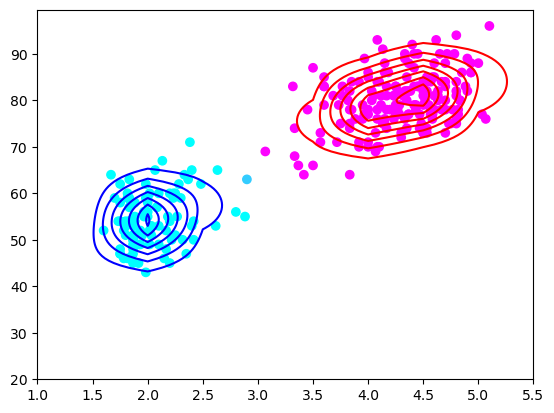

(array([[ 2.03638855, 54.47851729],
        [ 4.28966205, 79.96811615]]),
 array([[[ 0.06916774,  0.43516838],
         [ 0.43516838, 33.6972872 ]],
 
        [[ 0.16996833,  0.94060802],
         [ 0.94060802, 36.0461967 ]]]),
 array([0.35587289, 0.64412711]),
 array([[2.59216254e-09, 9.99999997e-01],
        [9.99999998e-01, 1.90802390e-09],
        [8.42185470e-06, 9.99991578e-01],
        [9.99989331e-01, 1.06687698e-05],
        [1.00123896e-21, 1.00000000e+00],
        [9.92667714e-01, 7.33228615e-03],
        [1.38328653e-24, 1.00000000e+00],
        [2.62658559e-10, 1.00000000e+00],
        [9.99999998e-01, 2.22112587e-09],
        [3.19371694e-19, 1.00000000e+00],
        [9.99999997e-01, 2.56649372e-09],
        [1.19577662e-13, 1.00000000e+00],
        [3.77795436e-16, 1.00000000e+00],
        [1.00000000e+00, 6.13569975e-11],
        [8.16065776e-24, 1.00000000e+00],
        [9.99999962e-01, 3.83867432e-08],
        [9.99999962e-01, 3.82279723e-08],
        [1.86014377e-25,

In [29]:
mean, covariance, pi, gamma, labels=gaussianMixtureModel(df,2,delta=1e-4) #implement the Gaussian Mixture Model with 2 clusters
(mean, covariance, pi, gamma, labels) #display the mean, covariance, pi, gamma and labels

**Question 5**

In [30]:
# type: ignore

import numpy as np #for numerical computation

# bias of coina
ta = 0.1

# bias of coinb
tb = 0.8

# the number of trials
d = 10

# total samples
n = 30

# hidden A =0 B=1
z = np.zeros(n)

# number of heads
x = np.zeros(n)

# For each trial, randomly choose whether to pick A or B
for i in range(n): # loop through the samples
    if np.random.uniform() < 0.5:  # picking A
        x[i] = np.random.binomial(d, ta) # np.random.binomial(n, p) returns a random number from binomial distribution = number of successes in n trials
    else: # picking B
        x[i] = np.random.binomial(d, tb)  # np.random.binomial(n, p) returns a random number from binomial distribution = number of successes in n trials
        if np.random.uniform() < 0.5: # if the random number is less than 0.5 then set z to 1
            z[i] = 1 # set z to 1

# print(x)
# print(z)

# forget zs
currAEst = 0.51  # current estimate of A
currBEst = 0.534  # current estimate of B

repeatcount = 1000  # instead of checking for convergence
gammaiA = np.zeros(n)  # creating a vector of zeros
gammaiB = np.zeros(n)


for i in range(repeatcount): # loop through the repeat count
    # EStep starts
    for j in range(n): # loop through the samples
        gammaiA[j] = 0.5 * np.power(currAEst, x[j]) * \
            np.power(1-currAEst, d-x[j])
        # mathematically,
        # gammaiA[j] = P(z[j] = 0 | x[j], theta) = P(x[j] | z[j] = 0, theta) * P(z[j] = 0 | theta) / P(x[j] | theta)
        gammaiA[j] /= (0.5*np.power(currAEst, x[j]) * np.power(1-currAEst, d-x[j]) +
                       0.5 * np.power(currBEst, x[j]) * np.power(1-currBEst, d-x[j]))
        gammaiB[j] = 1 - gammaiA[j]

    numA = denA = numB = denB = 0
    # Estep ends

    # MStep starts
    for k in range(n):
        numA += gammaiA[k]*x[k]  # sum of gammaiA * x
        numB += gammaiB[k]*x[k]  # sum of gammaiB * x
        denA += gammaiA[k]*d    # Finding the denominator of the Mstep for A
        denB += gammaiB[k]*d    # Finding the denominator of the Mstep for B
    currAEst = numA/denA  # Finding the new estimate of A
    currBEst = numB/denB    # Finding the new estimate of B
    # Msteps ends

print(currAEst, currBEst)
# currAEst gives me he probability of coin being in cluster A
# currBEst gives me he probability of coin being in cluster B


0.09284939738188092 0.7800034946788723


In [32]:
y_pred = (gammaiA < gammaiB).astype(int) # if gammaiA < gammaiB then y_pred = 1 else y_pred = 0
y_pred # display the predictions

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0])

In [33]:
error_rate = np.sum(y_pred != z)/n # calculate the error rate
error_rate # display the error rate

0.36666666666666664

**Question 6**

In [49]:
import matplotlib.pyplot as plt #for data visualization
import numpy as np #for numerical computation
import pandas as pd #for data manipulation and analysis
import seaborn as sns #for data visualization
import sklearn.metrics#for model evaluation
from scipy.io import loadmat #for loading matlab files
from scipy.stats import multivariate_normal as mvn #for multivariate normal distribution

In [50]:
from sklearn.datasets import load_digits #for loading the digits dataset
digits = load_digits() #load the digits dataset
df = pd.DataFrame(digits.data) #convert the digits data to a dataframe
df['target'] = digits.target #add the target column to the dataframe
df #display the dataframe

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [51]:
df[df.columns[:-1]] = (df[df.columns[:-1]] > 0.5).astype(int) #binarize the features
df #display the dataframe

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1
2,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,1,0,2
3,0,0,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,1,0,0,3
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,1,0,0,9
1793,0,0,1,1,1,1,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0
1794,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,1,1,0,0,8
1795,0,0,1,1,1,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,9


In [52]:
x = df.drop('target', axis=1) #features
x #display the features

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2,0,0,0,1,1,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
3,0,0,1,1,1,1,0,0,0,1,...,1,0,0,0,1,1,1,1,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,1,1,1,1,0,0,0,1,...,1,0,0,0,1,1,1,1,0,0
1793,0,0,1,1,1,1,1,0,0,0,...,1,0,0,0,1,1,1,1,0,0
1794,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
1795,0,0,1,1,1,0,0,0,0,0,...,1,0,0,0,1,1,1,1,0,0


In [53]:
y = df['target'] #target
y #display the target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

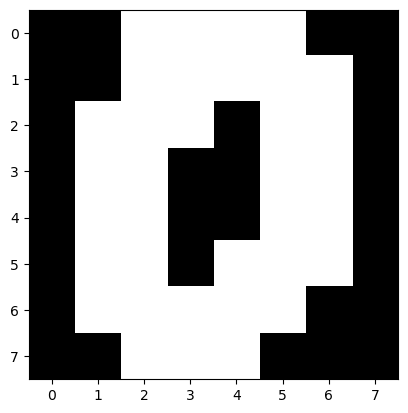

In [54]:
plt.imshow(x.iloc[0].values.reshape(8,8), cmap='gray') #display the first image
plt.show() #display the plot

In [55]:
y.value_counts() #display the count of each target

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [56]:
def E_Step(X, mu, pi): #function to calculate the E-step
    N = X.shape[0] #number of points
    K = mu.shape[0] #number of clusters
    gamma = np.zeros((N, K), dtype=np.float64) #initialize the gamma

    for k in range(K): #loop through the clusters
        gamma[:, k] = np.prod((mu[k]**X)*((1-mu[k])**(1-X)), axis=1) * pi[k] #calculate the gamma

    gamma *= pi #multiply by pi
    gamma /= np.sum(gamma, axis=1, keepdims=True) #normalize the gamma

    return gamma #return the gamma


In [57]:
def M_Step(X, gamma,Nk): #function to calculate the M-step
    N = X.shape[0] #number of points
    K = gamma.shape[1] #number of clusters
    D = X.shape[1] #number of features
    pi = np.sum(gamma, axis=0, dtype=np.float64) / N #calculate the pi
    mu = (np.sum(gamma[:, :, None] * X[:, None, :], axis=0) / Nk[:, None]) #calculate the mu
    return mu, pi #return the mu and pi


In [58]:
def logLikelihood(X, gamma, mu, pi): #function to calculate the log likelihood
    N = X.shape[0] #number of points
    K = gamma.shape[1] #number of clusters
    D = X.shape[1]  #number of features
    ll = 0 #initialize the log likelihood
    for k in range(K): #loop through the clusters
        ll += np.sum(gamma[:, k] * np.log(pi[k] * np.prod((mu[k]**X)*((1-mu[k])**(1-X)), axis=1))) #calculate the log likelihood
    return ll #return the log likelihood
    

In [59]:
def EM(df, K, delta=0.001): #function to implement the EM algorithm
    X = df.to_numpy() #convert the dataframe to a numpy array
    N, D = X.shape #number of points and features

    # Initialize mu and pi
    mu = np.random.uniform(low=0.25, high=0.75, size=(K, D)) #initialize mu
    mu = mu / np.sum(mu, axis=1, keepdims=True) #normalize mu
    pi = np.random.uniform(.25, .75, K) #initialize pi
    pi = pi / np.sum(pi) #normalize pi

    cur_llh = 1e9 #initialize the current log likelihood
    prev_llh = 0.0 #initialize the previous log likelihood
    iter = 0 #initialize the iteration
    while (abs(cur_llh-prev_llh) > delta): #loop until convergence
        gamma = E_Step(X, mu, pi)
        Nk = np.sum(gamma, axis=0) #calculate Nk
        mu, pi = M_Step(X, gamma,Nk)
        # Nk = np.sum(gamma, axis=0) #calculate Nk
        # mu = (gamma.T @ X) / Nk[:, None] #calculate mu 
        # pi = Nk / N #calculate pi

        iter += 1 #increment the iteration
        prev_llh = cur_llh #update the previous log likelihood
        cur_llh = logLikelihood(X, gamma, mu, pi) #calculate the current log likelihood

    label = np.argmax(gamma, axis=1) #get the labels
    print(iter) #print the number of iterations
    return mu, pi, label, gamma #return mu, pi, label and gamma


In [61]:
K = 10 #number of clusters
mu, pi, label, gamma = EM(x, K) #implement the EM algorithm
(mu, pi, label, gamma) #display the mu, pi, label and gamma

4


C:\Users\Rujul\AppData\Local\Temp\ipykernel_6484\2373587830.py:7: RuntimeWarning: divide by zero encountered in log
  ll += np.sum(gamma[:, k] * np.log(pi[k] * np.prod((mu[k]**X)*((1-mu[k])**(1-X)), axis=1))) #calculate the log likelihood
C:\Users\Rujul\AppData\Local\Temp\ipykernel_6484\2373587830.py:7: RuntimeWarning: invalid value encountered in multiply
  ll += np.sum(gamma[:, k] * np.log(pi[k] * np.prod((mu[k]**X)*((1-mu[k])**(1-X)), axis=1))) #calculate the log likelihood


(array([[0.00000000e+00, 4.07926329e-01, 9.67312083e-01, 1.00000000e+00,
         9.53593147e-01, 6.96583401e-01, 3.54725171e-01, 1.29670645e-02,
         1.25864346e-02, 7.59397213e-01, 9.96458019e-01, 9.93217212e-01,
         9.68811637e-01, 7.77399228e-01, 3.90099780e-01, 1.09002128e-02,
         7.12529078e-03, 7.24172874e-01, 9.67628038e-01, 8.86464739e-01,
         7.21120926e-01, 4.23629734e-01, 1.20585688e-01, 1.80798224e-11,
         3.18805206e-03, 5.60543701e-01, 8.67527083e-01, 9.81088093e-01,
         9.02001449e-01, 3.61934535e-01, 1.75593382e-02, 9.50016210e-28,
         0.00000000e+00, 2.88498210e-01, 8.15247644e-01, 9.77719052e-01,
         9.58523059e-01, 2.75424471e-01, 2.15548862e-03, 0.00000000e+00,
         6.71587665e-15, 2.36507894e-01, 6.54692654e-01, 8.75201275e-01,
         8.89833385e-01, 4.42968218e-01, 7.56840303e-02, 7.55344173e-04,
         3.26342318e-03, 3.80030107e-01, 9.44395022e-01, 9.66577222e-01,
         9.75694170e-01, 6.91590252e-01, 2.88621585

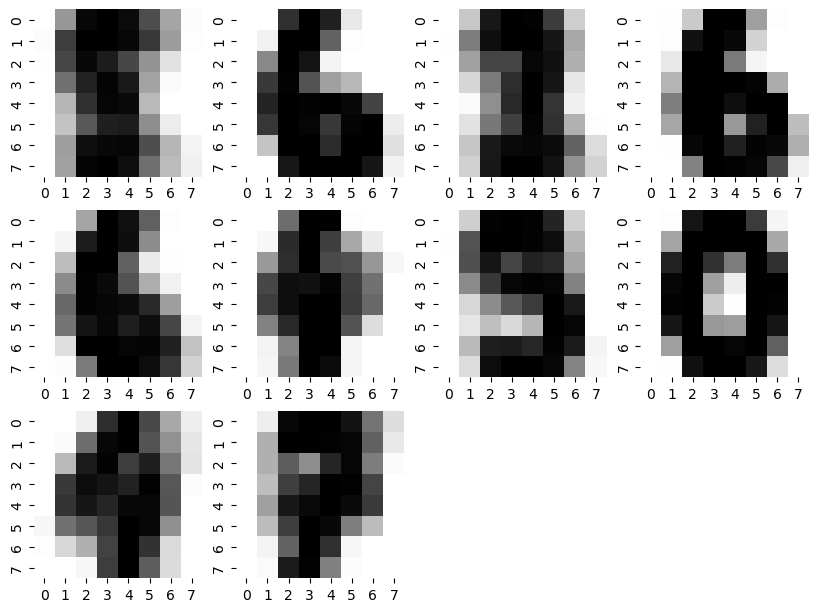

In [62]:
plt.figure(figsize=(10, 10)) #create a new figure
for i in range(0, K): #loop through the clusters
    plt.subplot(4,4, i+1) #create subplots
    sns.heatmap(mu[i].reshape(8, 8), cmap='binary', cbar=False) #plot the heatmap
plt.show() #display the plot


In [63]:
arr = [5,6,1,0,3,9,8,2,4,7] #initialize the array
y_pred = np.zeros(gamma.shape[0]) #initialize the predictions
for i in range(0, gamma.shape[0]): #loop through the data
    y_pred[i] = arr[int(label[i])] #get the predictions

y_pred #display the predictions

array([2., 4., 3., ..., 1., 8., 1.])

In [64]:
acc = sklearn.metrics.accuracy_score(y, y_pred) #calculate the accuracy
acc #display the accuracy

0.32053422370617696

In [65]:
Misclassified_points = (1-acc)*gamma.shape[0] #calculate the misclassified points
Misclassified_points #display the misclassified points

1221.0

In [66]:
confusionMat = sklearn.metrics.confusion_matrix(y, y_pred) #calculate the confusion matrix
confusionMat #display the confusion matrix

array([[  0,   0, 172,   0,   5,   0,   0,   0,   1,   0],
       [  0,  58,   0,  13,  59,  42,   0,   4,   0,   6],
       [  0,  94,   0,   2,   3,  75,   0,   0,   3,   0],
       [  0,  77,   0,   0,   0,   5,   0,   1, 100,   0],
       [  0,   0,   0,   6, 152,   3,   0,   6,   0,  14],
       [  1,  10,   0,   3,   5, 106,   0,   1,  56,   0],
       [ 32,   0,   0,  63,   1,   3,  79,   0,   3,   0],
       [  0,   1,   0,   0,  15,   1,   0, 161,   0,   1],
       [  0,  75,   0,   8,  13,  57,   0,   1,  20,   0],
       [  0,   7,   0,   0,  22,   3,   0,   8, 140,   0]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

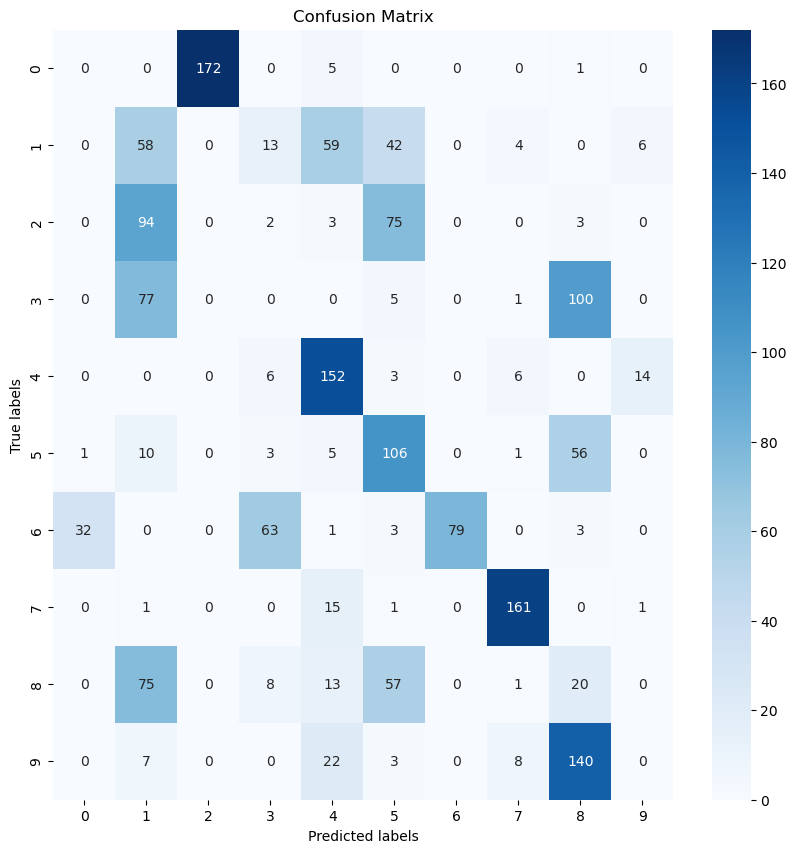

In [67]:

ax = plt.subplots(figsize=(10, 10)) #create a new figure
ax = sns.heatmap(confusionMat, annot=True, fmt='g',cmap='Blues') #plot the heatmap
ax.set_xlabel('Predicted labels') #set the x label
ax.set_ylabel('True labels') #set the y label
ax.set_title('Confusion Matrix') #set the title

**Question 7 (a), 7 (b)**

In [68]:
import math #for mathematical operations
import numpy as np #for numerical computation
import pandas as pd #for data manipulation and analysis
import sklearn.metrics #for model evaluation
from scipy.special import erfinv #for inverse error function

In [69]:
N = 10000   # number of data points
p1 = 0.05  # probability of class 1
p0 = 0.95  # probability of class 0
dataset = np.array([[]])  # initialize dataset

In [70]:
y = np.random.binomial(1, p1, N) # generate the labels
x = np.where(y == 0, np.random.normal(0, 1, N), np.random.normal(1, 1, N)) # generate the features
dataset = np.column_stack((x, y)) # stack the features and labels
dataset.shape # display the shape of the dataset

(10000, 2)

In [71]:
df = pd.DataFrame(dataset, columns=['X', 'Y']) # convert the dataset to a dataframe
df.head() # display the first 5 rows of the dataframe

,X,Y
0,1.266876,0.0
1,2.710749,0.0
2,-1.161271,1.0
3,0.653446,0.0
4,0.608324,0.0


In [72]:
def f0(x, mu=0, sigma=1): # function to calculate the probability of class 0
    x = float(x - mu) / sigma # calculate the z-score which is the number of standard deviations from the mean
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma # calculate the probability of class 0

def f1(x, mu=1, sigma=1): # function to calculate the probability of class 1
    x = float(x - mu) / sigma # calculate the z-score which is the number of standard deviations from the mean
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma # calculate the probability of class 1

In [73]:
Hb = np.zeros(N) # initialize the bayesian hypothesis

for i in range(0, N): # loop through the data
    y = df.iloc[i][1] # get the label
    x = df.iloc[i][0] # get the feature
    Q1 = (p1*f1(x))/(p1*f1(x)+p0*f0(x)) # calculate the probability of class 1
    Q0 = (p0*f0(x))/(p1*f1(x)+p0*f0(x)) # calculate the probability of class 0
    if Q1 >= Q0: # if the probability of class 1 is greater than the probability of class 0
        Hb[i] = 1 # assign the label 1 to the bayesian hypothesis
    else: # if the probability of class 0 is greater than the probability of class 1
        Hb[i] = 0 # assign the label 0 to the bayesian hypothesis

In [74]:
df['Hb'] = Hb # add the bayesian hypothesis to the dataframe
df.head() # display the first 5 rows of the dataframe

,X,Y,Hb
0,1.266876,0.0,0.0
1,2.710749,0.0,0.0
2,-1.161271,1.0,0.0
3,0.653446,0.0,0.0
4,0.608324,0.0,0.0


In [75]:
import numpy as np #for numerical computation

f = np.zeros((2, 2)) #initialize the confusion matrix
idx1 = df.iloc[:, 1] == 1 #get the indices where the true label is 1
idx2 = df.iloc[:, 2] == 1 #get the indices where the bayesian hypothesis is 1
f[0][0] = np.sum(idx1 & idx2) #calculate the true positives
f[1][0] = np.sum(idx1 & ~idx2) #calculate the false negatives
f[0][1] = np.sum(~idx1 & idx2) #calculate the false positives
f[1][1] = np.sum(~idx1 & ~idx2) #calculate the true negatives
f #display f which is the confusion matrix

array([[1.000e+00, 1.000e+00],
       [5.060e+02, 9.492e+03]])

In [76]:
TP = f[0][0] #get the true positives
TN = f[1][1] #get the true negatives
FP = f[0][1] #get the false positives
FN = f[1][0] #get the false negatives
(FP,TP) #display the false positives and true positives

(1.0, 1.0)

In [77]:
precision = TP/(TP+FP) #calculate the precision 
recall = TP/(TP+FN) #calculate the recall
print("Precision: " + str(precision)) #False Positive Rate
print("Recall: " + str(recall)) #True Positive Rate

Precision: 0.5
Recall: 0.0019723865877712033


**Question 7 (c)**

In [78]:
confusionMat = sklearn.metrics.confusion_matrix(df['Y'], df['Hb']) #calculate the confusion matrix
confusionMat #display the confusion matrix

array([[9492,    1],
       [ 506,    1]], dtype=int64)

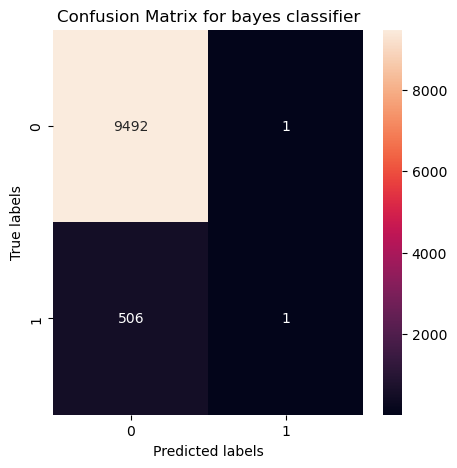

In [79]:
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization

fig, ax = plt.subplots(figsize=(5, 5)) #create a new figure
sns.heatmap(confusionMat, annot=True, fmt='g', ax=ax) #plot the heatmap
ax.set_xlabel('Predicted labels') #set the x label
ax.set_ylabel('True labels') #set the y label
ax.set_title('Confusion Matrix for bayes classifier') #set the title
plt.show() #display the plot

In [80]:
countOfWrongPredictions = np.sum(y != Hb) #calculate the count of wrong predictions
Perr = countOfWrongPredictions / N #calculate the error rate
Perr #display the error rate

0.0002

# Neyman Pearson Classifier

In [81]:
df2 = pd.DataFrame(dataset, columns=['X', 'Y']) #convert the dataset to a dataframe
df2.head() #display the first 5 rows of the dataframe

,X,Y
0,1.266876,0.0
1,2.710749,0.0
2,-1.161271,1.0
3,0.653446,0.0
4,0.608324,0.0


**Question 7 (d)**

# Description
**According to Neyman Pearson Classifier, let us say the type 1 error that is Probability of false alarm is upper bounded by some alpha, then the classifier would predict class 1 if f1/f0 > K where K is such that P(f1/f0<=K | X belongs to class 0)=1-alpha.
 Using these calculations, for the class conditional densities given in question, classifier would predict class 1 if X>tau, where  tau = erfinverse(1-2*alpha)*(2^(1/2))**

In [82]:
alpha = 0.2 #set the alpha value
tau = erfinv(1-2*alpha)*(math.sqrt(2)) #calculate the tau value

In [83]:
y_pred = np.zeros(df2.shape[0]) #initialize the predictions
y_pred[df2['X'] > tau] = 1 #if the feature is greater than tau then set the prediction to 1

In [84]:
sklearn.metrics.accuracy_score(y_pred, df2["Y"]) #calculate the accuracy

0.7872

In [85]:
confusionMat = sklearn.metrics.confusion_matrix(df2['Y'], y_pred) #calculate the confusion matrix
confusionMat #display the confusion matrix

array([[7596, 1897],
       [ 231,  276]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Neyman Pearson Classifier')

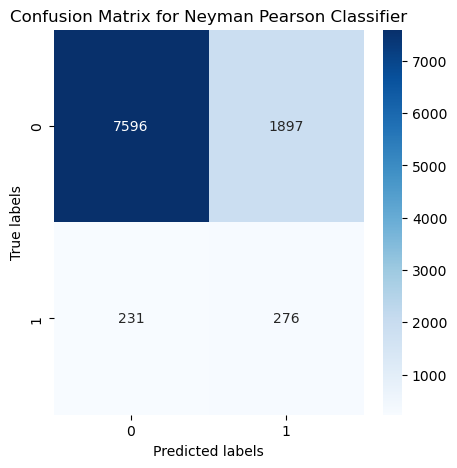

In [86]:
ax = plt.subplots(figsize=(5, 5)) #create a new figure
ax = sns.heatmap(confusionMat, annot=True, fmt='g', cmap='Blues') #plot the heatmap
ax.set_xlabel('Predicted labels') #set the x label
ax.set_ylabel('True labels') #set the y label
ax.set_title('Confusion Matrix for Neyman Pearson Classifier') #set the title

**Question 7 (e)**

# Description
**ROC curve is a plot between Probability of correct detection and Probability of false alarm for different thresholds.**

**H(x)=1 if x>=tau**

**H(x)=0 if x < tau**

**So Pcd=1-P(x <= tau | X belongs to class 1) Pfa=P(x>tau | X belongs to class 0)**

**By elimination tau from these two equations, we would get a relationship between Pcd and Pfa which has been shown in function "calc"**

In [87]:
def calc(Pfa): #function to calculate the probability of detection
    Pcd = -(math.erf(erfinv(1-2*Pfa)-1.0/math.sqrt(2))-1.0)/2.0 #calculate the probability of detection
    return Pcd #return the probability of detection

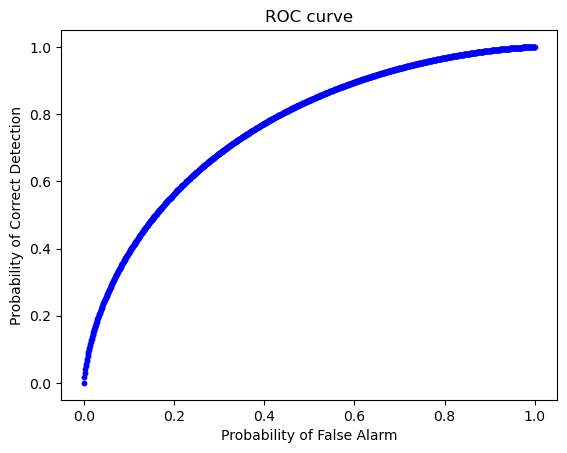

In [88]:
Pfas = np.linspace(0, 1, 1000) #generate the probability of false alarm
for i in range(0, len(Pfas)): #loop through the probability of false alarm
    plt.scatter(Pfas[i], calc(Pfas[i]), s=10, c=["b"]) #plot the probability of detection
plt.title("ROC curve") #set the title
plt.ylabel("Probability of Correct Detection") #set the y label
plt.xlabel("Probability of False Alarm") #set the x label
plt.show() #display the plot

**Question 7 (f)**

# Description
**Considering that cost of P(h(x)!=y|y=0) and P(h(x)!=y|y=1) are equal**

**Therefore for the minimax classifier, integration of f1 over R0 is equal to integration of f0 over R1, by solving this equation, we would get R0 and R1. In this case, by solving this equation, R0 is for x<0.5 and R1 is for x>=0.5**

In [89]:
y_pred = np.zeros(df2.shape[0]) #initialize the predictions
for i in range(0, df2.shape[0]): #loop through the data
    if df2.iloc[i]['X'] >= 0.5: #if the feature is greater than 0.5
        y_pred[i] = 1 #set the prediction to 1
    else: #if the feature is less than 0.5
        y_pred[i] = 0 #set the prediction to 0

In [90]:
sklearn.metrics.accuracy_score(y_pred, df2["Y"]) #calculate the accuracy

0.6896

Text(0.5, 1.0, 'Confusion Matrix for Minimax Classifier')

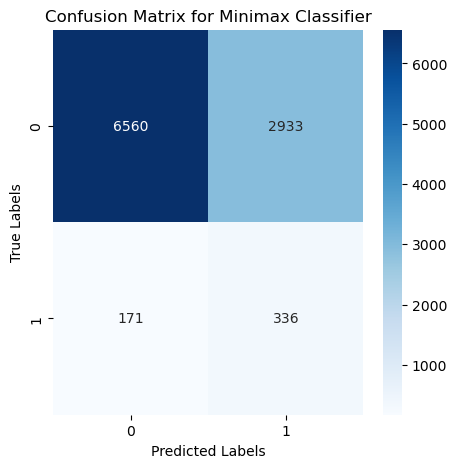

In [91]:
confusionMatrix = sklearn.metrics.confusion_matrix(df2['Y'], y_pred) #calculate the confusion matrix
confusionMatrix #display the confusion matrix
ax = plt.subplots(figsize=(5, 5)) #create a new figure
ax = sns.heatmap(confusionMatrix, annot=True, fmt='g', cmap='Blues') #plot the heatmap
ax.set_xlabel('Predicted Labels') #set the x label
ax.set_ylabel('True Labels') #set the y label
ax.set_title('Confusion Matrix for Minimax Classifier') #set the title